In [11]:
import sklearn
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from fomlads.evaluate.eval_regression import train_and_test_partition
from fomlads.evaluate.eval_regression import train_and_test_filter
from fomlads.evaluate.eval_regression import create_cv_folds

from sklearn.neighbors import KNeighborsClassifier


In [12]:
dataset = pd.read_csv('./Data/Used Dataset.csv')

In [13]:
# Produce inputs and target from dataset

number_of_columns = 14
inputs = dataset.iloc[:, 0:13].to_numpy()
targets = dataset['track_genre'].to_numpy()
print(inputs)
print(targets)

[[4.40000e+01 6.21000e-03 7.11000e-01 ... 3.82000e-02 1.42065e+02
  6.07000e-01]
 [3.40000e+01 3.47000e-01 7.29000e-01 ... 1.84000e-01 7.99690e+01
  2.87000e-01]
 [3.90000e+01 9.18000e-01 4.84000e-01 ... 3.46000e-02 8.27070e+01
  2.06000e-01]
 ...
 [5.10000e+01 5.97000e-03 6.93000e-01 ... 1.46000e-01 1.31079e+02
  3.95000e-01]
 [6.50000e+01 8.31000e-02 7.82000e-01 ... 4.41000e-02 7.58860e+01
  3.54000e-01]
 [6.70000e+01 1.02000e-01 8.62000e-01 ... 1.01000e-01 9.92010e+01
  7.65000e-01]]
['Jazz' 'Jazz' 'Jazz' ... 'Hip-Hop' 'Hip-Hop' 'Hip-Hop']


In [14]:
# Split the dataset into training + validation data and testing data

train_filter, test_filter = train_and_test_filter(len(dataset))

train_validation_inputs, train_validation_targets, test_inputs, test_targets = train_and_test_partition(inputs, targets, train_filter, test_filter)

In [15]:
# Partition the training + validation data into training data and validation data

N = len(dataset)
number_of_folds = 4
random_seed = 1
np.random.seed(random_seed)
folds = create_cv_folds(N, number_of_folds)  

train_inputs = []
train_targets = []
validation_inputs = []
validation_targets = []

for i in range(number_of_folds):
    train_inputs1, train_targets1, validation_inputs1, validation_targets1 = train_and_test_partition(inputs, targets, folds[i][0], folds[i][1])
    train_inputs.append(train_inputs1)
    train_targets.append(train_targets1)
    validation_inputs.append(validation_inputs1)
    validation_targets.append(validation_targets1)
    
print(train_inputs)
print(train_targets)
print(validation_inputs)
print(validation_targets)

# Their lengths should be the same as the number of folds

print(len(train_inputs))
print(len(train_targets))
print(len(validation_inputs))
print(len(validation_targets))

[array([[4.40000e+01, 6.21000e-03, 7.11000e-01, ..., 3.82000e-02,
        1.42065e+02, 6.07000e-01],
       [3.40000e+01, 3.47000e-01, 7.29000e-01, ..., 1.84000e-01,
        7.99690e+01, 2.87000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       ...,
       [5.90000e+01, 3.34000e-02, 9.13000e-01, ..., 2.98000e-01,
        9.80280e+01, 3.30000e-01],
       [7.20000e+01, 1.57000e-01, 7.09000e-01, ..., 5.50000e-02,
        1.22043e+02, 1.13000e-01],
       [6.50000e+01, 8.31000e-02, 7.82000e-01, ..., 4.41000e-02,
        7.58860e+01, 3.54000e-01]]), array([[3.90000e+01, 9.18000e-01, 4.84000e-01, ..., 3.46000e-02,
        8.27070e+01, 2.06000e-01],
       [3.60000e+01, 3.45000e-02, 4.73000e-01, ..., 6.30000e-02,
        1.04694e+02, 3.83000e-01],
       [6.30000e+01, 6.99000e-01, 5.80000e-01, ..., 2.69000e-02,
        9.30370e+01, 3.64000e-01],
       ...,
       [5.10000e+01, 5.97000e-03, 6.93000e-01, ..., 1.46000e-01,
        

In [27]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
#class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', 
#                       leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

#Here we change different K-value from 1 to 100 to get a set of accuracy and comparing among them


mean_accuracies_knn = []
k_value = [n for n in range(1,101) if n%2 == 1]
# Here we only use the odd K-value

for k in k_value:
    accuracy = []
    for i in range(number_of_folds):
        Knn = KNeighborsClassifier(n_neighbors = k)
        Knn.fit(train_inputs[i], train_targets[i])
        predict_targets = Knn.predict(validation_inputs[i])
        accuracy_i = accuracy_score(validation_targets[i], predict_targets)
        accuracy.append(accuracy_i)
    mean_accuracy_fold = np.mean(accuracy)
    mean_accuracies_knn.append(mean_accuracy_fold)

print(mean_accuracies_knn)


[0.3248627589870728, 0.31981583141491055, 0.31543297326013814, 0.31937311846998406, 0.31831060740216044, 0.31530015937666017, 0.3116256419337702, 0.3129537807685497, 0.3147246325482557, 0.31782362316274126, 0.31769080927926335, 0.3185762351691163, 0.31999291659288115, 0.3212325128386754, 0.322295023906499, 0.32132105542766065, 0.32388879050823444, 0.32260492296794757, 0.3219408535505578, 0.32269346555693285, 0.32419868956968295, 0.3230033646183814, 0.32238356649548433, 0.32136532672215334, 0.32512838675402866, 0.32526120063750663, 0.3242872321586683, 0.3261908978218523, 0.32574818487692575, 0.3249070302815654, 0.32424296086417564, 0.32406587568620504, 0.32397733309721977, 0.3258367274659111, 0.3256596422879405, 0.3258809987604037, 0.32703205241721267, 0.32765185054010976, 0.32902426066938195, 0.3277846644235877, 0.328891446785904, 0.3286258190189481, 0.3284487338409775, 0.3289357180803966, 0.3271648663006906, 0.3277846644235877, 0.32986541526474233, 0.33141491057198513, 0.3315919957499

Text(0.5, 1.0, 'Accuracy and K-value')

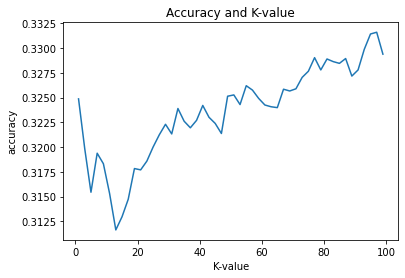

In [28]:
#Plot

plt.figure()
plt.plot(k_value, mean_accuracies_knn, '-')
plt.xlabel('K-value')
plt.ylabel('accuracy')
plt.title('Accuracy and K-value')

In [29]:
# Calculate the confidence interval
interval = stats.t.interval(0.95, 100 - 1, np.mean(mean_accuracies_knn), np.std(mean_accuracies_knn, ddof=1) / (100**(1/2)))
print(np.mean(mean_accuracies_knn))
print(interval) 

0.32356383920665843
(0.32262129637584624, 0.3245063820374706)


In [30]:
best_knn_index = np.argmax(np.array(mean_accuracies_knn)) 
best_k_value = (best_knn_index +1) *2 -1
worst_knn_index = np.argmin(np.array(mean_accuracies_knn))
worst_k_value = (worst_knn_index+1) *2 -1
print(f"best k value is {best_k_value}, worst k value is {worst_k_value}")

best k value is 97, worst k value is 13


In [31]:
# Invoke function again with the best n_estimator
Knn2 = KNeighborsClassifier(n_neighbors = best_k_value)
Knn2.fit(train_validation_inputs, train_validation_targets) 
Knn2_predict_targets = Knn2.predict(test_inputs)
Knn2_accuracy = accuracy_score(test_targets, Knn2_predict_targets)
print(Knn2_accuracy)

0.32538705137227303
